### Importing the libraries

In [192]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

### Load the data

In [193]:
data=pd.read_csv('retail_data.csv')

### Display top 5 rows of the datase

In [194]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-10 8:26,3.39,17850.0,United Kingdom


### Splitting InvoiceDate into day, month and year

In [195]:
data['Dates'] = pd.to_datetime(data['InvoiceDate']).dt.date
data['Time'] = pd.to_datetime(data['InvoiceDate']).dt.time

In [196]:
data['Month']=pd.to_datetime(data['Dates']).dt.month
data['Day']=pd.to_datetime(data['Dates']).dt.day
data['Year']=pd.to_datetime(data['Dates']).dt.year

In [197]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Dates,Time,Month,Day,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-10 8:26,2.55,17850.0,United Kingdom,2010-12-01,08:26:00,12,1,2010
1,536365,71053,WHITE METAL LANTERN,6,12-01-10 8:26,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,12,1,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-10 8:26,2.75,17850.0,United Kingdom,2010-12-01,08:26:00,12,1,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-10 8:26,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,12,1,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-10 8:26,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,12,1,2010


### Find the shape of dataset (number of rows and columns)

In [198]:
data.shape

(541909, 13)

### Display essential information of the dataset

In [199]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
 8   Dates        541909 non-null  object 
 9   Time         541909 non-null  object 
 10  Month        541909 non-null  int64  
 11  Day          541909 non-null  int64  
 12  Year         541909 non-null  int64  
dtypes: float64(2), int64(4), object(7)
memory usage: 53.7+ MB


In [200]:
# Number of unique countries
data.Country.nunique()

38

In [201]:
data.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [202]:
# Dropping the duplicate values from customer and country
customer_country=data[['Country','CustomerID']].drop_duplicates()

### Number of customer id as per countries and respective nunber of enitries

In [203]:
customer_country.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID', ascending=False)

,Country,CustomerID
36,United Kingdom,3950
14,Germany,95
13,France,87
31,Spain,31
3,Belgium,25
33,Switzerland,21
27,Portugal,19
19,Italy,15
12,Finland,12
1,Austria,11


## Data Cleaning
### Checking null values

In [204]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Dates               0
Time                0
Month               0
Day                 0
Year                0
dtype: int64

The number of attributes having missing values is: 2


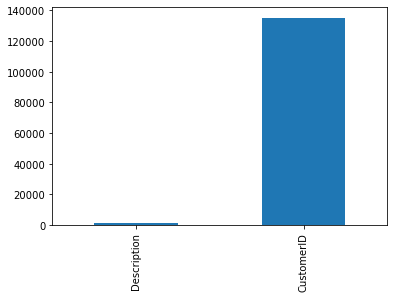

In [205]:
missing=data.isnull().sum()
missing=missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()
print("The number of attributes having missing values is: " + str(len(missing)))

## Imputing missing values and irrelevant values

### Dropping the customer id column as it has 133,600 missing values

In [206]:
data = data[pd.notnull(data['CustomerID'])]

### Removing the negative values from Quantity 

In [207]:
data = data[(data['Quantity']>0)]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397924 non-null  object 
 1   StockCode    397924 non-null  object 
 2   Description  397924 non-null  object 
 3   Quantity     397924 non-null  int64  
 4   InvoiceDate  397924 non-null  object 
 5   UnitPrice    397924 non-null  float64
 6   CustomerID   397924 non-null  float64
 7   Country      397924 non-null  object 
 8   Dates        397924 non-null  object 
 9   Time         397924 non-null  object 
 10  Month        397924 non-null  int64  
 11  Day          397924 non-null  int64  
 12  Year         397924 non-null  int64  
dtypes: float64(2), int64(4), object(7)
memory usage: 42.5+ MB


In [208]:
data.shape

(397924, 13)

### Initializing the last data and converting the datetime columnn into a datetime object

In [209]:
NOW = dt.datetime(2011,12,10)                                    # Last Date of the year 2011
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

### Unique Values in each column

In [210]:
for i in data.columns:
    count = data[i].nunique()
    print(i, ": ", count)

InvoiceNo :  18536
StockCode :  3665
Description :  3877
Quantity :  302
InvoiceDate :  17286
UnitPrice :  441
CustomerID :  4339
Country :  37
Dates :  305
Time :  738
Month :  12
Day :  31
Year :  2


### Checking the numerical columns

In [211]:
data.describe()

,Quantity,UnitPrice,CustomerID,Month,Day,Year
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171,7.612537,15.042181,2010.934259
std,180.420210,22.096788,1713.169877,3.416527,8.653771,0.247829
min,1.000000,0.000000,12346.000000,1.000000,1.000000,2010.000000
25%,2.000000,1.250000,13969.000000,5.000000,7.000000,2011.000000
50%,6.000000,1.950000,15159.000000,8.000000,15.000000,2011.000000
75%,12.000000,3.750000,16795.000000,11.000000,22.000000,2011.000000
max,80995.000000,8142.750000,18287.000000,12.000000,31.000000,2011.000000


### Add a column named revenue

In [212]:
data["revenue"] = data["Quantity"] * data["UnitPrice"]

In [213]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Dates,Time,Month,Day,Year,revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,08:26:00,12,1,2010,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,12,1,2010,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,08:26:00,12,1,2010,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,12,1,2010,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,12,1,2010,20.34


In [214]:
new_data = data.groupby('CustomerID').agg({'InvoiceDate': lambda x: (NOW - x.max()).days, 'InvoiceNo': lambda x: len(x),
                                           'revenue': lambda x: x.sum()})

In [215]:
new_data.head()

,InvoiceDate,InvoiceNo,revenue
CustomerID,,,
12346.0,325,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,18,73,1757.55
12350.0,310,17,334.40


In [216]:
new_data['InvoiceDate'] = new_data['InvoiceDate'].astype(int)

In [217]:
new_data.rename(columns={'InvoiceDate': 'Date_Time', 'InvoiceNo': 'Number_of_transactions', 'revenue': 'Total_Purchase'}, inplace=True)
new_data.head()

,Date_Time,Number_of_transactions,Total_Purchase
CustomerID,,,
12346.0,325,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,18,73,1757.55
12350.0,310,17,334.40


### Splitting the dataset into parts

In [218]:
new_data_parts = new_data

In [219]:
parts = new_data_parts.quantile(q=[0.25,0.5,0.75])
parts = parts.to_dict()
parts

{'Date_Time': {0.25: 17.0, 0.5: 50.0, 0.75: 141.5},
 'Number_of_transactions': {0.25: 17.0, 0.5: 41.0, 0.75: 100.0},
 'Total_Purchase': {0.25: 307.24499999999995,
  0.5: 674.4499999999998,
  0.75: 1661.64}}

In [220]:
def date_score(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def frequency_Purchase_Score(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [221]:
new_data_parts['Data_time_part'] = new_data_parts['Date_Time'].apply(date_score, args=('Date_Time',parts,))
new_data_parts['Frequency_part'] = new_data_parts['Number_of_transactions'].apply(frequency_Purchase_Score, args=('Number_of_transactions',parts,))
new_data_parts['Total_part'] = new_data_parts['Total_Purchase'].apply(frequency_Purchase_Score, args=('Total_Purchase',parts,))
new_data_parts.head()

,Date_Time,Number_of_transactions,Total_Purchase,Data_time_part,Frequency_part,Total_part
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12347.0,2,182,4310.00,1,1,1
12348.0,75,31,1797.24,3,3,1
12349.0,18,73,1757.55,2,2,1
12350.0,310,17,334.40,4,4,3


new_data_parts['Final_Part'] = new_data_parts.Data_time_part.map(str) + new_data_parts.Frequency_part.map(str) + new_data_parts.Total_part.map(str)
new_data_parts.head()

In [225]:
new_data_parts[new_data_parts['Final_Part']=='111'].sort_values('Total_Purchase', ascending=False).head(10)

,Date_Time,Number_of_transactions,Total_Purchase,Data_time_part,Frequency_part,Total_part,Final_Part
CustomerID,,,,,,,
14646.0,1,2080,280206.02,1,1,1,111
18102.0,0,431,259657.30,1,1,1,111
17450.0,8,337,194550.79,1,1,1,111
14911.0,1,5677,143825.06,1,1,1,111
14156.0,9,1400,117379.63,1,1,1,111
17511.0,2,963,91062.38,1,1,1,111
16684.0,4,277,66653.56,1,1,1,111
14096.0,4,5111,65164.79,1,1,1,111
13694.0,3,568,65039.62,1,1,1,111


### Potential Customers from the dataset who can be targeted

In [259]:
new_data_parts[new_data_parts['Final_Part'].isin(['111','121','122','222','221','212'])].sort_values('Total_Purchase', 
                                                                                                  ascending=False)

,Date_Time,Number_of_transactions,Total_Purchase,Data_time_part,Frequency_part,Total_part,Final_Part
CustomerID,,,,,,,
14646.0,1,2080,280206.02,1,1,1,111
18102.0,0,431,259657.30,1,1,1,111
17450.0,8,337,194550.79,1,1,1,111
14911.0,1,5677,143825.06,1,1,1,111
14156.0,9,1400,117379.63,1,1,1,111
...,...,...,...,...,...,...,...
15582.0,24,44,682.91,2,2,2,222
13430.0,18,49,679.45,2,2,2,222
13607.0,40,98,678.01,2,2,2,222


### Insights

### Number of items sold per Month

In [231]:
data.groupby('Month')['Quantity'].sum()

Month
1     349147
2     265638
3     348544
4     292225
5     373685
6     363699
7     369432
8     398938
9     544899
10    593908
11    681888
12    599693
Name: Quantity, dtype: int64

<AxesSubplot:xlabel='Month', ylabel='Quantity'>

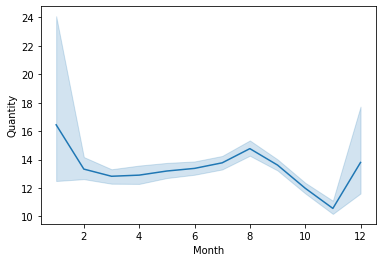

In [232]:
sns.lineplot(data=data, x="Month", y="Quantity")

### Maximum and minimum month of sales

In [234]:
data_revenue = pd.DataFrame()
data_revenue["Revenue"] = pd.DataFrame(data.groupby('Month')['revenue'].sum())
data_revenue

,Revenue
Month,
1,569445.040
2,447137.350
3,595500.760
4,469200.361
5,678594.560
6,661213.690
7,600091.011
8,645343.900
9,952838.382


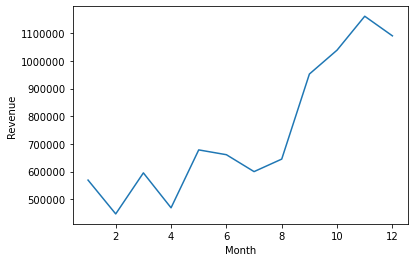

In [235]:
sns.lineplot(data=data_revenue, x="Month", y="Revenue")
plt.ticklabel_format(style='plain', axis='y')

###  Month With maximum revenue is 11 (November), lets check the maximum revenue date in November

In [236]:
data_max_month_revenue = pd.DataFrame(data.loc[data['Month'] == 12])
data_max_month_revenue.groupby('Day')['revenue'].sum()

Day
1      90910.48
2      92030.22
3      23921.71
4      20375.96
5      89973.81
6      77359.68
7     123149.52
8      89768.23
9     222581.18
10     33650.28
12     17305.77
13     27642.68
14     29322.30
15     30311.72
16     49030.08
17     20046.56
19      7417.39
20     19621.96
21     15951.66
22      4886.52
23      5648.97
Name: revenue, dtype: float64

<AxesSubplot:xlabel='Day', ylabel='revenue'>

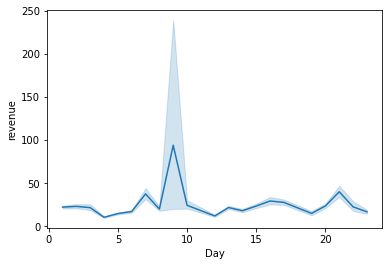

In [237]:
sns.lineplot(data=data_max_month_revenue, x="Day", y="revenue")

### Yearwise Revenue

In [238]:
data_revenue_year = pd.DataFrame()
data_revenue_year["Revenue"] = pd.DataFrame(data.groupby('Year')['revenue'].sum())
data_revenue_year

,Revenue
Year,
2010,572713.890
2011,8338694.014


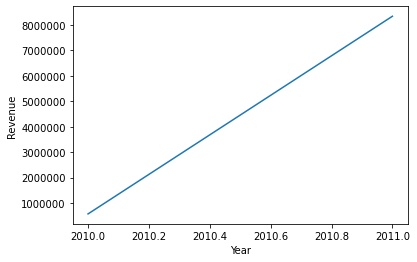

In [239]:
sns.lineplot(data=data_revenue_year, x="Year", y="Revenue")
plt.ticklabel_format(style='plain', axis='y')

### Daywise Revenue

In [241]:
data_max_month_revenue.groupby('Day')['revenue'].sum().max()

222581.18000000002

### Maximum sales took place on 9th November, lets calculate the time now

In [242]:
data_max_month_revenue_time = pd.DataFrame(data.loc[data['Day'] == 9])
data_max_month_revenue_time

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Dates,Time,Month,Day,Year,revenue
19632,537879,22114,HOT WATER BOTTLE TEA AND SYMPATHY,12,2010-12-09 08:34:00,3.95,14243.0,United Kingdom,2010-12-09,08:34:00,12,9,2010,47.40
19633,537879,22835,HOT WATER BOTTLE I AM SO POORLY,8,2010-12-09 08:34:00,4.65,14243.0,United Kingdom,2010-12-09,08:34:00,12,9,2010,37.20
19634,537879,85150,LADIES & GENTLEMEN METAL SIGN,6,2010-12-09 08:34:00,2.55,14243.0,United Kingdom,2010-12-09,08:34:00,12,9,2010,15.30
19635,537879,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,4,2010-12-09 08:34:00,7.95,14243.0,United Kingdom,2010-12-09,08:34:00,12,9,2010,31.80
19636,537879,21524,DOORMAT SPOTTY HOME SWEET HOME,2,2010-12-09 08:34:00,7.95,14243.0,United Kingdom,2010-12-09,08:34:00,12,9,2010,15.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-09,12:50:00,12,9,2011,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-09,12:50:00,12,9,2011,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09,12:50:00,12,9,2011,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09,12:50:00,12,9,2011,16.60


In [243]:
data_max_time_revenue = pd.DataFrame(data_max_month_revenue_time.groupby('Time')['revenue'].sum())
data_max_time_revenue.loc[data_max_time_revenue["revenue"] > 168837]

### Maximum Revenue in the maximum sales month is at 9:15 

,revenue
Time,
09:15:00,168837.86


### Product Frequency

In [244]:
revenue_stocks = tuple(data.groupby('StockCode')['revenue'].sum())
stockcode_tuple = data["StockCode"].unique()
stockcode_tuple.sort()
stockcode_tuple

array(['10002', '10080', '10120', ..., 'M', 'PADS', 'POST'], dtype=object)

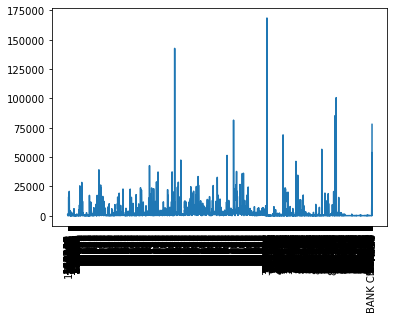

In [245]:
sns.lineplot(x=stockcode_tuple, y=revenue_stocks)
plt.xticks(rotation=90);

### StockCode of the maximum sold product

In [246]:
x = max(revenue_stocks)
y = revenue_stocks.index(x)
stockcode_tuple = tuple(stockcode_tuple)
stockcode_tuple[y]

'23843'

### Maximum and Minimum revenue from each product

In [ ]:
data.groupby('StockCode')['revenue'].sum().max()

In [ ]:
data.groupby('StockCode')['revenue'].sum().min()

### Number of Customers in each year

In [247]:
data.groupby('Year')['CustomerID'].nunique()

Year
2010     885
2011    4220
Name: CustomerID, dtype: int64

In [248]:
data_year_2010 = pd.DataFrame(data.loc[data["Year"] == 2010])
data_year_2011 = pd.DataFrame(data.loc[data["Year"] == 2011])

### Customers in the year 2010

In [249]:
data_year_2010.groupby('Month')['CustomerID'].nunique()

Month
12    885
Name: CustomerID, dtype: int64

### Customers in the year 2011

In [250]:
number_of_customers = tuple(data_year_2011.groupby('Month')['CustomerID'].nunique())
month1 = (1,2,3,4,5,6,7,8,9,10,11,12)

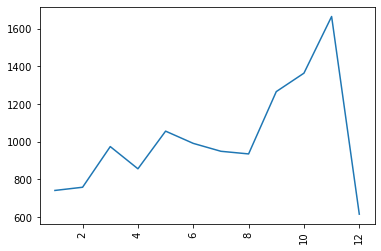

In [251]:
sns.lineplot(x=month1, y=number_of_customers)
plt.xticks(rotation=90);